# Apache Spark es un motor unificado de analíticas para procesar datos a gran escala que integra módulos para SQL, streaming, aprendizaje automático y procesamiento de grafos


# Apache Spark Koalas

Este notebook contiene las funciones principales de Koalas, obtenidas de la documentación oficial de https://koalas.readthedocs.io/

In [5]:
#!pip install plotly

In [6]:
import sys
sys.executable

'c:\\Users\\osval\\anaconda3\\envs\\ProcesBigdata\\python.exe'

In [7]:
import findspark
findspark.init()

import pandas as pd
import pyspark

import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession

### 1. Creación de objetos



Creando una serie Koalas pasando una lista de valores, permitiendo que Koalas cree un índice entero predeterminado:

In [8]:
s = ps.Series([1, 3, 5, np.nan, 6, 8])

In [9]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creando  DataFrame pasando un dict de objetos que se pueden convertir a series.

In [10]:
kdf = ps.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [11]:
kdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


Creando un DataFrame de pandas pasando una matriz numpy, con un índice de fecha y hora y columnas etiquetadas:

In [12]:
dates = pd.date_range('20130101', periods=6)

In [13]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [15]:
pdf

,A,B,C,D
2013-01-01,1.474231,-0.138626,-0.364702,0.824122
2013-01-02,1.076967,0.717783,0.878124,0.083212
2013-01-03,-1.539773,-0.255809,-0.771947,-0.940948
2013-01-04,1.095970,-0.758996,0.105751,-1.997137
2013-01-05,2.218931,-0.036327,0.962153,0.586311
2013-01-06,0.471647,0.127473,-0.398578,0.964820


Ahora, este DataFrame de pandas se puede convertir en un DataFrame de Koalas

In [16]:
kdf = ps.from_pandas(pdf)

In [17]:
type(kdf)

pyspark.pandas.frame.DataFrame

Sin embargo, se ve y se comporta igual que un DataFrame de pandas

In [18]:
kdf

,A,B,C,D
2013-01-01,1.474231,-0.138626,-0.364702,0.824122
2013-01-02,1.076967,0.717783,0.878124,0.083212
2013-01-03,-1.539773,-0.255809,-0.771947,-0.940948
2013-01-04,1.095970,-0.758996,0.105751,-1.997137
2013-01-05,2.218931,-0.036327,0.962153,0.586311
2013-01-06,0.471647,0.127473,-0.398578,0.964820


Además, es posible crear un **Koalas DataFrame desde Spark DataFrame**.

Creando un Spark DataFrame a partir de pandas DataFrame

In [19]:
spark = SparkSession.builder.getOrCreate()

In [20]:
sdf = spark.createDataFrame(pdf)

In [21]:
sdf.show()

+------------------+--------------------+-------------------+-------------------+
|                 A|                   B|                  C|                  D|
+------------------+--------------------+-------------------+-------------------+
|1.4742313995453369|-0.13862587064193077|-0.3647021306192174| 0.8241221734295632|
|1.0769666509161668|  0.7177834770571231|  0.878123666136073|0.08321206149317097|
|-1.539772886232136|  -0.255808607913505|-0.7719467767738151|-0.9409482258451424|
|1.0959696710524252|  -0.758995807455246|0.10575075943992289|-1.9971365525012008|
| 2.218931354555737|-0.03632705573747...| 0.9621528015805937|  0.586311234646245|
| 0.471646842773632| 0.12747291908841007|-0.3985775924741223| 0.9648202249661911|
+------------------+--------------------+-------------------+-------------------+



Creando Koalas DataFrame desde Spark DataFrame.
`to_koalas ()` se adjunta automáticamente a Spark DataFrame y está disponible como una API cuando se importa Koalas.

In [22]:
kdf = sdf.to_koalas()

In [23]:
kdf

,A,B,C,D
0,1.474231,-0.138626,-0.364702,0.824122
1,1.076967,0.717783,0.878124,0.083212
2,-1.539773,-0.255809,-0.771947,-0.940948
3,1.095970,-0.758996,0.105751,-1.997137
4,2.218931,-0.036327,0.962153,0.586311
5,0.471647,0.127473,-0.398578,0.964820


Tiene [dtypes] específicos. Actualmente se admiten los tipos que son comunes a Spark y pandas.

In [24]:
kdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

### 2. Manipulación de datos


A diferencia de los pandas, los datos en un dataframe de datos de Spark no están _ordenados_, no tienen una noción intrínseca de índice. Cuando se le solicite el encabezado, Spark solo tomará el número solicitado de filas de una partición. **No hay que utilizar el df de Koalas para devolver filas específicas**, use `.loc` o` iloc` en su lugar.

In [25]:
kdf.head()

,A,B,C,D
0,1.474231,-0.138626,-0.364702,0.824122
1,1.076967,0.717783,0.878124,0.083212
2,-1.539773,-0.255809,-0.771947,-0.940948
3,1.095970,-0.758996,0.105751,-1.997137
4,2.218931,-0.036327,0.962153,0.586311


Muestre el índice, las columnas y los datos numéricos subyacentes.

También puede recuperar el índice; la columna de índice se puede atribuir a un DataFrame, ver más adelante

In [26]:
kdf.index

Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [27]:
kdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [28]:
kdf.to_numpy()

c:\Users\osval\anaconda3\envs\ProcesBigdata\lib\site-packages\pyspark\pandas\utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


array([[ 1.4742314 , -0.13862587, -0.36470213,  0.82412217],
       [ 1.07696665,  0.71778348,  0.87812367,  0.08321206],
       [-1.53977289, -0.25580861, -0.77194678, -0.94094823],
       [ 1.09596967, -0.75899581,  0.10575076, -1.99713655],
       [ 2.21893135, -0.03632706,  0.9621528 ,  0.58631123],
       [ 0.47164684,  0.12747292, -0.39857759,  0.96482022]])

**Describe** muestra un resumen estadístico rápido de sus datos

In [29]:
kdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.799662,-0.057417,0.068467,-0.079937
std,1.281766,0.484506,0.716613,1.165876
min,-1.539773,-0.758996,-0.771947,-1.997137
25%,0.471647,-0.255809,-0.398578,-0.940948
50%,1.076967,-0.138626,-0.364702,0.083212
75%,1.474231,0.127473,0.878124,0.824122
max,2.218931,0.717783,0.962153,0.964820


Transposición de sus datos

In [30]:
kdf.T

,0,1,2,3,4,5
A,1.474231,1.076967,-1.539773,1.095970,2.218931,0.471647
B,-0.138626,0.717783,-0.255809,-0.758996,-0.036327,0.127473
C,-0.364702,0.878124,-0.771947,0.105751,0.962153,-0.398578
D,0.824122,0.083212,-0.940948,-1.997137,0.586311,0.964820


Ordenando por su índice

In [31]:
kdf.sort_index(ascending=False)

,A,B,C,D
5,0.471647,0.127473,-0.398578,0.964820
4,2.218931,-0.036327,0.962153,0.586311
3,1.095970,-0.758996,0.105751,-1.997137
2,-1.539773,-0.255809,-0.771947,-0.940948
1,1.076967,0.717783,0.878124,0.083212
0,1.474231,-0.138626,-0.364702,0.824122


Ordenar por valor

In [32]:
kdf.sort_values(by='B')

,A,B,C,D
3,1.095970,-0.758996,0.105751,-1.997137
2,-1.539773,-0.255809,-0.771947,-0.940948
0,1.474231,-0.138626,-0.364702,0.824122
4,2.218931,-0.036327,0.962153,0.586311
5,0.471647,0.127473,-0.398578,0.964820
1,1.076967,0.717783,0.878124,0.083212


### 3. Datos faltantes
utiliza principalmente el valor `np.nan` para representar los datos faltantes. Por defecto, no se incluye en los cálculos.


In [33]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [34]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [35]:
kdf1 = ps.from_pandas(pdf1)

In [36]:
kdf1

,A,B,C,D,E
2013-01-01,1.474231,-0.138626,-0.364702,0.824122,1.0
2013-01-02,1.076967,0.717783,0.878124,0.083212,1.0
2013-01-03,-1.539773,-0.255809,-0.771947,-0.940948,NaN
2013-01-04,1.095970,-0.758996,0.105751,-1.997137,NaN


Para eliminar las filas que tienen datos faltantes.

In [37]:
kdf1.dropna(how='any')

,A,B,C,D,E
2013-01-01,1.474231,-0.138626,-0.364702,0.824122,1.0
2013-01-02,1.076967,0.717783,0.878124,0.083212,1.0


Llenando los datos faltantes.

In [38]:
kdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,1.474231,-0.138626,-0.364702,0.824122,1.0
2013-01-02,1.076967,0.717783,0.878124,0.083212,1.0
2013-01-03,-1.539773,-0.255809,-0.771947,-0.940948,5.0
2013-01-04,1.095970,-0.758996,0.105751,-1.997137,5.0


### 4. Operaciones

#### Estadísticas
Las operaciones en general excluyen los datos faltantes.

Realización de una estadística descriptiva:

In [39]:
kdf.mean()

A    0.799662
B   -0.057417
C    0.068467
D   -0.079937
dtype: float64

#### Configuraciones de Spark

Varias configuraciones en PySpark se pueden aplicar internamente en Koalas.
Por ejemplo, puede habilitar la optimización de Arrow para acelerar enormemente la conversión de pandas internos.

In [40]:
prev = spark.conf.get("spark.sql.execution.arrow.enabled")  # Keep its default value.
ps.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.

import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [42]:
spark.conf.set("spark.sql.execution.arrow.enabled", True)
%timeit ps.range(300000).to_pandas()

103 ms ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
spark.conf.set("spark.sql.execution.arrow.enabled", False)
%timeit ps.range(300000).to_pandas()

595 ms ± 38.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
ps.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.enabled", prev)  # Set its default value back.

#### Agrupación
Por "agrupar por" nos referimos a un proceso que involucra uno o más de los siguientes pasos:

- Dividir los datos en grupos según algunos criterios.
- Aplicar una función a cada grupo de forma independiente
- Combinar los resultados en una estructura de datos

In [46]:
kdf = ps.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [47]:
kdf

,A,B,C,D
0,foo,one,-1.737705,0.152447
1,bar,one,1.502534,1.335316
2,foo,two,-1.062178,-0.013603
3,bar,three,-0.626690,-1.680638
4,foo,two,2.173287,-0.780677
5,bar,two,-0.708437,-0.155784
6,foo,one,1.216929,-0.763004
7,foo,three,-0.551587,-0.056581


Agrupar y luego aplicar el **sum** a los grupos resultantes.

In [48]:
kdf.groupby('A').sum()

,C,D
A,,
foo,0.038746,-1.461418
bar,0.167407,-0.501106


In [49]:
kdf.groupby(['A', 'B']).sum()

C         D
A   B                        
foo one   -0.520776 -0.610557
bar one    1.502534  1.335316
foo two    1.111110 -0.794280
bar three -0.626690 -1.680638
    two   -0.708437 -0.155784
foo three -0.551587 -0.056581

### 5. Visualización de datos: Generar gráficos


In [50]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [51]:
kser = ps.Series(pser)

In [52]:
kser = kser.cummax()
kser

2000-01-01   -0.829821
2000-01-02   -0.829821
2000-01-03   -0.829821
2000-01-04    1.346839
2000-01-05    1.346839
2000-01-06    1.346839
2000-01-07    1.346839
2000-01-08    1.346839
2000-01-09    1.346839
2000-01-10    1.835047
2000-01-11    1.835047
2000-01-12    1.835047
2000-01-13    1.835047
2000-01-14    1.835047
2000-01-15    1.835047
2000-01-16    1.835047
2000-01-17    1.835047
2000-01-18    1.835047
2000-01-19    1.835047
2000-01-20    1.835047
2000-01-21    1.835047
2000-01-22    1.835047
2000-01-23    1.835047
2000-01-24    1.835047
2000-01-25    1.969914
2000-01-26    1.969914
2000-01-27    1.969914
2000-01-28    1.969914
2000-01-29    1.969914
2000-01-30    1.969914
2000-01-31    1.969914
2000-02-01    1.969914
2000-02-02    1.969914
2000-02-03    1.969914
2000-02-04    1.969914
2000-02-05    1.969914
2000-02-06    1.969914
2000-02-07    1.969914
2000-02-08    1.969914
2000-02-09    1.969914
2000-02-10    2.817444
2000-02-11    2.817444
2000-02-12    2.817444
2000-02-13 

**Gráficos de matplotlib**

<Axes: >

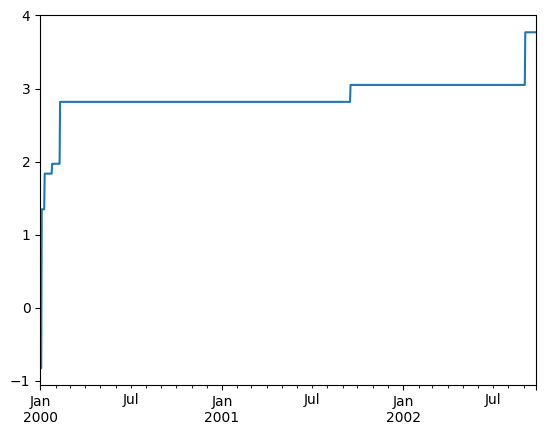

In [53]:
ps.options.plotting.backend = "matplotlib"

kser.plot()